# Import Libraries

In [2]:
import os

from alive_progress import alive_bar

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2


# Function Definitions

In [3]:
def load_images(path):
    images = []
    filenames = os.listdir(path)

    with alive_bar(len(filenames), title="Loading Images", bar='smooth', spinner=None) as bar:
        for filename in filenames:
            image = cv2.imread(os.path.join(path, filename))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image)
            bar()

    return np.array(images, dtype=object)


def preprocess_images(images):
    preprocessed_images = []

    with alive_bar(len(images), title="Preprocessing Images", bar='smooth', spinner=None) as bar:
        for image in images:
            image = cv2.cvtColor(np.array(image).astype(
                'uint8'), cv2.COLOR_RGB2GRAY)
            # image = image / 255.
            preprocessed_images.append(image)
            bar()

    return np.array(preprocessed_images)

# Load Images

In [4]:
main_dir = './fruits_dataset'
train_dir = f'{main_dir}/train'
classnames = ['freshapples', 'freshbanana', 'freshoranges',
              'rottenapples', 'rottenbanana', 'rottenoranges']
idx2class = {i: classname for i, classname in enumerate(classnames)}

class_0 = load_images(f'{train_dir}/freshapples')
class_1 = load_images(f'{train_dir}/freshbanana')
class_2 = load_images(f'{train_dir}/freshoranges')
class_3 = load_images(f'{train_dir}/rottenapples')
class_4 = load_images(f'{train_dir}/rottenbanana')
class_5 = load_images(f'{train_dir}/rottenoranges')

Loading Images |████████████████████████████████████████| 1693/1693 [100%] in 10.4s (162.03/s) 
Loading Images |████████████████████████████████████████| 1581/1581 [100%] in 10.5s (151.07/s) 
Loading Images |████████████████████████████████████████| 1466/1466 [100%] in 8.9s (165.47/s) 
Loading Images |████████████████████████████████████████| 2342/2342 [100%] in 14.4s (162.49/s) 
Loading Images |████████████████████████████████████████| 2224/2224 [100%] in 15.6s (142.98/s) 
Loading Images |████████████████████████████████████████| 1595/1595 [100%] in 7.0s (227.52/s) 


# Plot Class Distribution

We can see that the classes are not balanced. We will need to take this into account when training and evaluating our model.

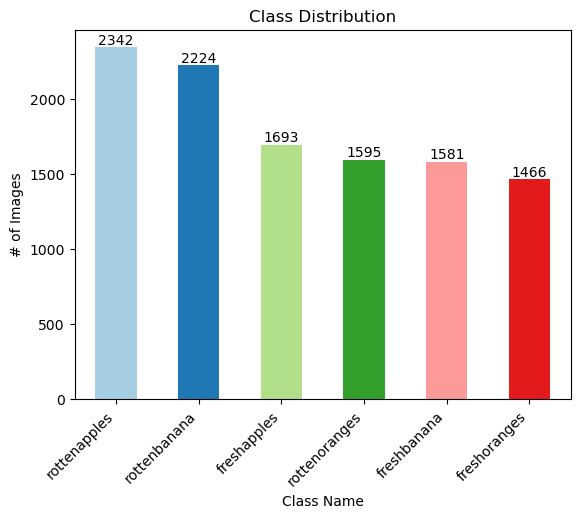

In [5]:
class_0_num_samples = len(class_0)
class_1_num_samples = len(class_1)
class_2_num_samples = len(class_2)
class_3_num_samples = len(class_3)
class_4_num_samples = len(class_4)
class_5_num_samples = len(class_5)

labels = np.array(
    [0] * class_0_num_samples +
    [1] * class_1_num_samples +
    [2] * class_2_num_samples +
    [3] * class_3_num_samples +
    [4] * class_4_num_samples +
    [5] * class_5_num_samples)

all_images = list(class_0) + list(class_1) + list(class_2) + \
    list(class_3) + list(class_4) + list(class_5)

df = pd.DataFrame(zip(all_images, labels), columns=['Image', 'Class'])
df['Class'] = df['Class'].map(idx2class)
bar = df['Class'].value_counts().plot(
    kind='bar', color=plt.get_cmap("Paired").colors,  # type: ignore
    title='Class Distribution',
    xlabel='Class Name',
    ylabel='# of Images')

plt.xticks(rotation=45, ha='right')

for p in bar.containers:  # type: ignore
    bar.bar_label(p, fmt='%d', label_type='edge')